<a href="https://colab.research.google.com/github/ParalelaUnsaac/G2-2020-1/blob/main/CalculadoradeMatricesV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO DE OPERACIONES CON MATRICES**






##**1. Explicación del trabajo**
Este proyecto lo escogimos porque encontramos los módulos necesarios y modificables y también por los temas de matrices y vectores, ya que nos basamos ampliamente en esos temas, las diferentes operaciones de matrices como algunas de las clases de matrices con vectores;
En este proyecto trabajaremos con 4 módulos, estos serán:
* La suma de vectores
* La suma de matrices
* Multiplicación de matrices
* Transpuesta de una matriz


##**2.	Planteamiento del problema**
Como sabemos, las operaciones de matrices por lo general tiene una complejidad de $O(n^2)$, esto debido a que al operar cada elemento, se requiere recorrer la matriz. Lo que se trata de hacer con este proyecto es que con ayuda de la paralelización, nosotros podamos reducir la complejidad de cada algunas operaciones con matrices y vectores.

##**3. Explicación de los módulos**

###3.1 Suma de Vectores
**SumaVectores (vector 1, vector 2) -> Vector Resultante**

Para este módulo de Suma de Vectores se deben ingresan dos parámetros de tipo Vector, ya implementos en un módulo anterior, y nos retorna un vector resultante.
El procedimiento de la Suma de Vectores se realizará mediante iteraciones el cual nos permitirá obtener los valores del vector 1 y del vector 2; y sumar el resultado en un tercer vector vacío.

$Vector1[i] + Vector2[i]=VectorR[i]$



###3.2 Suma de Matrices
**SumaMatrices (matriz 1, matriz 2) -> Vector Resultante**

Para este módulo de Suma de Matrices se deben ingresan dos parámetros de tipo matriz, ya implementos en un módulo anterior, y nos retorna una matriz resultante.
El procedimiento de la Suma de Matrices se realizará mediante iteraciones el cual nos permitirá obtener los valores de la matriz 1 y de la matriz 2; y sumar el resultado en una tercera matriz vacía.

$Matriz1[i][i] + Matriz2[i][i] = MatrizR[i][i]$



###3.3 Multiplicación de Matrices
**MultiplicaciónMatrices (matriz 1, matriz 2) -> Vector Resultante**

Para este módulo de Multiplicación de Matrices se deben ingresan dos parámetros de tipo matriz, ya implementos en un módulo anterior, y nos retorna una matriz resultante.
El procedimiento de la Multiplicar dos Matrices se realizará mediante iteraciones el cual nos permitirá obtener los valores de la matriz 1 y de la matriz 2; y multiplicar el resultado en una tercera matriz vacía.





###3.4 Transpuesta de Matriz
**TranspuestaMatriz (matriz 1) -> Vector Resultante**

Para este módulo de Transpuesta de una Matriz se debe ingresar un parámetro de tipo matriz, ya implementado en un módulo anterior, y nos retorna una matriz transpuesta.
El procedimiento de la Transpuesta de una Matriz se realizará mediante iteraciones el cual nos permitirá obtener intercambiar los valores de la matriz 1; excepto de la diagonal mayor y almacenar la matriz resultante en una matriz R.

$TransMatr[i][j] = Matriz1[j][i]$


    



##**4. Explicación de la paralelización**
En este proyecto, al tener varios bucles, se está empleando la **directiva for** para paralelizar los bucles haciendo que cada hilo se distribuya por el vector o matriz para realizar las distintas operaciones. Junto a este viene acompañado de la **directiva schedule** para indicar la forma en que se debe repartir las iteraciones de los bucles, la **directiva collapse** para colapsar los bucles anidados en uno solo y finalmente las **directivas shared y private** para designar que variables serán privadas para cada hilo y cuales serán compartidas entre cada hilo.

##**5. Diagramas**

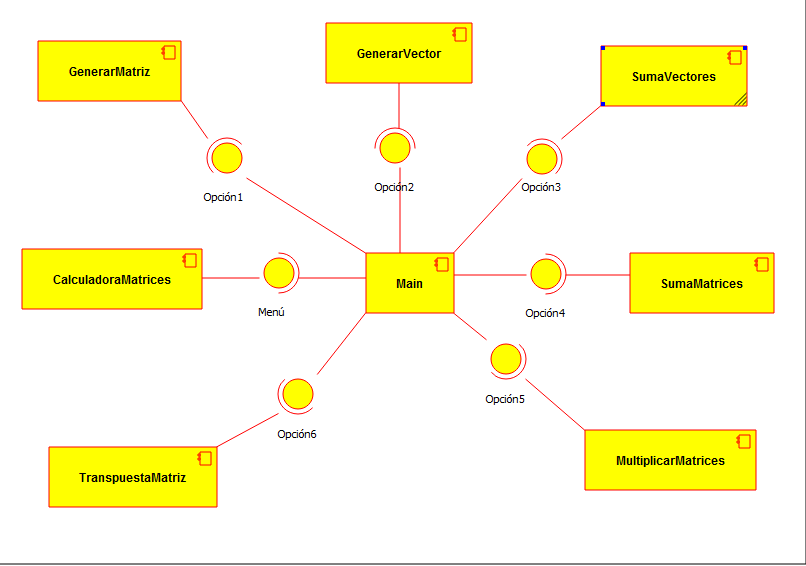

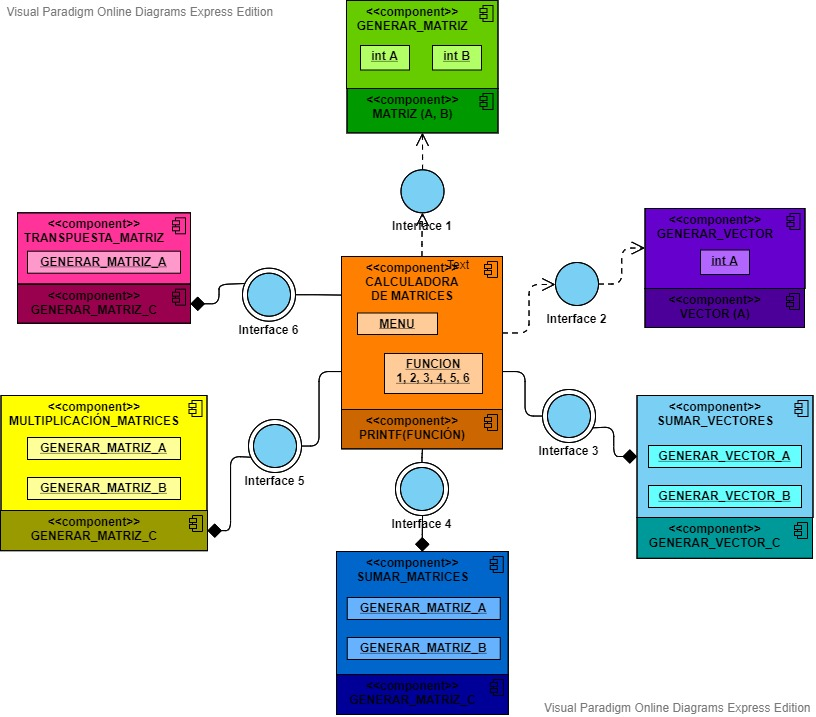

##**6. Código**

1. Guardando codigo de C en la variable **code**.

In [2142]:
code="""
#include <omp.h>
#include <stdio.h> 
#include <stdlib.h>
//using namespace; 
"""

###**6.1 Modulo GenerarVector**
Utilizando el metodo de GenerarVector.

In [2143]:
code+="""
//Generador de vectores de Tamanio N con valores aleatorios
int* GenerarVector(int TamanioVector)
{
	//Variables para determinar el tiempo de ejecución
  double InicioEjecucion, FinEjecucion;
  //Devolver el tiempo transcurrido hasta este pundo de ejecución
  InicioEjecucion = omp_get_wtime();
	//Reservar memoria para el vector con el tamanio determinado
	int* Vector = malloc(TamanioVector*sizeof(int*));
	int i;
	#pragma omp parallel 
	// Llenando el vector con valores random
	for (i = 0; i < TamanioVector; i++)
	{
		Vector[i] = rand() % 20 + 20;
	}
	//Mostrar Arreglo
	for (int k = 0; k < TamanioVector; k++){
    //printf("%d ",Vector[k]);
  }
	//Devolver el tiempo transcurrido del reloj hasta este punto de ejecucion.
  FinEjecucion = omp_get_wtime();
  //Mostrar el tiempo de ejecución
  printf("Tiempo de ejecucion de generar el vector: %f segundos\\n", FinEjecucion - InicioEjecucion);
	return Vector;
}
"""

###**6.2 Modulo GenerarMatriz**
Utilizando el metodo de GenerarMatriz.

In [2144]:
code+="""
//Generador de Matriz de tamaño N con valores aleatorios
int** GenerarMatriz(int TamanioMatriz)
{
	//Variables para determinar el tiempo de ejecución
  double InicioEjecucion, FinEjecucion;
  //Devolver el tiempo transcurrido hasta este pundo de ejecución
  InicioEjecucion = omp_get_wtime();
	//Declarando espacio de memoria
	int** matrix = malloc(TamanioMatriz*sizeof(int**));
	for (int i = 0; i < TamanioMatriz; i++)
		matrix[i] = malloc(TamanioMatriz*sizeof(int*));
	//Llenando la matriz con valores random
	//#pragma omp parallel for
	for (int i = 0; i < TamanioMatriz; i++)
	{
		for (int j = 0; j < TamanioMatriz; j++)
		{
			matrix[i][j] = rand() % 100 - 50;
			//printf("%d ",matrix[i][j]);
		}
        //printf("\\n");
	}
	//Devolver el tiempo transcurrido del reloj hasta este punto de ejecucion.
  FinEjecucion = omp_get_wtime();
  //Mostrar el tiempo de ejecución
  printf("Tiempo de ejecucion generar la matriz: %f segundos\\n", FinEjecucion - InicioEjecucion);
	return matrix;
}
"""

###**6.3 Modulo SumarVectores**
Utilizando el metodo de SumarVectores sin paralelizar.

In [2145]:
code+="""
//Sumar dos vectores
void Sumar_Vectores(int Longitud)
{
  //Variables para determinar el tiempo de ejecución
  double InicioEjecucion, FinEjecucion;
  //Devolver el tiempo transcurrido hasta este pundo de ejecución
  InicioEjecucion = omp_get_wtime();
	//Declarando espacio en memoria
	int* Vector1 = malloc(Longitud*sizeof(int*));
	int* Vector2 = malloc(Longitud*sizeof(int*));
  //Generar valores aleatorios para los vectores
	Vector1 = GenerarVector(Longitud);
	Vector2 = GenerarVector(Longitud);
  //Mostrar Vector1
  printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Vector1[k]);
  }
  //Mostrar Vector2
  printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Vector2[k]);
  }
	//Reservar memoria para el resultado con la misma longitud que los dos anteriores
	int* Suma = malloc(Longitud*sizeof(int*));
	for (int i = 0; i < Longitud; i++){
		Suma[i] = Vector1[i] + Vector2[i];
	}
	//Mostrar el resultado
  printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Suma[k]);
  }
  //Devolver el tiempo transcurrido del reloj hasta este punto de ejecucion.
  FinEjecucion = omp_get_wtime();
  //Mostrar el tiempo de ejecución
  printf("\\nTiempo de ejecucion de suma de vectores: %f segundos\\n", FinEjecucion - InicioEjecucion);
}
"""

Utilizando el método de SumaMatrices paralelizando.

In [2146]:
code+="""
//Sumar dos vectores
void Sumar_VectoresParalelo(int Longitud)
{
	//Variables para determinar el tiempo de ejecución
  double InicioEjecucion, FinEjecucion;
  //Devolver el tiempo transcurrido hasta este pundo de ejecución
  InicioEjecucion = omp_get_wtime();
	//Declarando espacio en memoria
	int* Vector1 = malloc(Longitud*sizeof(int*));
	int* Vector2 = malloc(Longitud*sizeof(int*));
	//Generar valores aleatorios para los vectores
	Vector1 = GenerarVector(Longitud);
	Vector2 = GenerarVector(Longitud);
	//Mostrar Vector1
	printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Vector1[k]);
  }
  //Mostrar Vector2
	printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Vector2[k]);
  }
	//Reservar memoria para el resultado con la misma longitud que los dos anteriores
	int* Suma = malloc(Longitud*sizeof(int*));
	//Declarar variables para la paralelización
	int i, tid, fin, inicio;
	#pragma omp parallel private(i, tid, inicio,fin) shared(Vector1, Vector2, Suma) 
	{
		tid = omp_get_thread_num(); //Asignar identificador
		int nth = omp_get_num_threads();
		inicio = tid * Longitud / nth;
		fin = (tid + 1) * Longitud / nth;
		//Sumar arreglo
		for (i = inicio; i < fin; i++)
		{
			Suma[i] = Vector1[i] + Vector2[i];
		}
	}
	//Mostrar el resultado
	printf("\\n");
	for (int k = 0; k < Longitud; k++){
    printf("%d ",Suma[k]);
  }
	//Devolver el tiempo transcurrido del reloj hasta este punto de ejecucion.
  FinEjecucion = omp_get_wtime();
  //Mostrar el tiempo de ejecución
  printf("\\nTiempo de ejecucion de suma de vectores paralelo: %f segundos\\n", FinEjecucion - InicioEjecucion);
}
"""

###**6.4 Modulo SumarMatrices**
Utilizando el metodo de SumarMatrices sin paralelizar.

In [2147]:
code+="""
//Sumar dos matrices sin paralelizar
void Suma_Matrices(int Longitud)
{
	double start;
    double end;
	start = omp_get_wtime();

    //Generar matices A Y B aleatoriamente
	int** A = malloc(Longitud*sizeof(int**));
	A = GenerarMatriz(Longitud);

	int** B = malloc(Longitud*sizeof(int**));
	B = GenerarMatriz(Longitud);

	//mostrar la matriz A generada
	//MostrarMatriz(A, Longitud);
  	
	//mostrar la matriz B generada
	//MostrarMatriz(B, Longitud);

	//inicializando matriz resultado C
	int** C = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		C[i] = malloc(Longitud*sizeof(int*));

	//inicializando valores
	int i,j;

    //Se empieza a efecutar la multiplicación 
    for (i = 0; i < Longitud; i++) 
        for (j = 0; j < Longitud; j++) 
            C[i][j] = A[i][j] + B[i][j];		
				
	//Mostrar el resultado de la suma de Matriz
	//MostrarMatriz(C,Longitud);	
	end = omp_get_wtime();
	printf("Tiempo de ejecucion de sumar matrices: %f segundos\\n", end - start);
}
"""

Utilizando el método de SumaMatrices paralelizando.

In [2148]:
code+="""
//Sumar dos matrices de forma paralela
void Suma_MatricesParalelo(int Longitud)
{
	double start;
    double end;
	start = omp_get_wtime();

    //Generar matices A Y B aleatoriamente
	int** A = malloc(Longitud*sizeof(int**));
	A = GenerarMatriz(Longitud);

	int** B = malloc(Longitud*sizeof(int**));
	B = GenerarMatriz(Longitud);

	//mostrar la matriz A generada
	//MostrarMatriz(A, Longitud);
  	
	//mostrar la matriz B generada
	//MostrarMatriz(B, Longitud);

	//inicializando matriz resultado C
	int** C = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		C[i] = malloc(Longitud*sizeof(int*));

	//inicializando valores
	int i,j;
	//empieza  la region paralela
	#pragma omp parallel 
	{
		#pragma omp for collapse (1)
		for (i = 0; i < Longitud; i++) 
			for (j = 0; j < Longitud; j++) 
				C[i][j] = A[i][j] + B[i][j];
	}			
				
	//Mostrar el resultado de la suma de Matriz
	//MostrarMatriz(C,Longitud);	
	end = omp_get_wtime();
	printf("Tiempo de ejecucion de sumar matrices paralelo: %f segundos\\n", end - start);
}
"""

###**6.5 Modulo MultiplicarMatrices**
Utilizando el método sin paralelizar.

In [2149]:
code+="""
void Multiplicacion_Matrices(int Longitud)
{
	double start;
    double end;
	start = omp_get_wtime();
//Generar matices A Y B aleatoriamente
	int** A = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		A[i] = malloc(Longitud*sizeof(int*));
	A = GenerarMatriz(Longitud);

	int** B = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		B[i] = malloc(Longitud*sizeof(int*));
	B = GenerarMatriz(Longitud);
  
	//inicializando matriz resultado C
	int** C = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		C[i] = malloc(Longitud*sizeof(int*));

	//inicializando valores
	int i,j,k;
	//empieza  la region paralela
	
	for (i = 0; i < Longitud	; i++) {
		for (j = 0; j < Longitud; j++) {
			float res=0;
			for (k = 0; k < Longitud; k++) {
				res=res+ A[i][k] * B[k][j];
		}
				C[i][j]=res;
			}
		}
			
	
	end = omp_get_wtime();
	printf("Tiempo de ejecucion de multiplicar matrices: %f segundos\\n", end - start);
}
"""

Utilizando el método paralelizado.

In [2150]:
code+="""
void Multiplicacion_MatricesParalelo(int Longitud)
{
	double start;
    double end;
	start = omp_get_wtime();
//Generar matices A Y B aleatoriamente
	int** A = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		A[i] = malloc(Longitud*sizeof(int*));
	A = GenerarMatriz(Longitud);

	int** B = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		B[i] = malloc(Longitud*sizeof(int*));
	B = GenerarMatriz(Longitud);
  
	//inicializando matriz resultado C
	int** C = malloc(Longitud*sizeof(int**));
	for (int i = 0; i < Longitud; i++)
		C[i] = malloc(Longitud*sizeof(int*));

	//inicializando valores
	int i,j,k;
	//empieza  la region paralela
    //#pragma omp parallel for collapse(2)
		for (i = 0; i < Longitud; i++) {
      		for (j = 0; j < Longitud; j++) {
				float res=0;
        		for (k = 0; k < Longitud; k++) {
            		res=res+ A[i][k] * B[k][j];
                }
				C[i][j]=res;
			}
		}
	
	end = omp_get_wtime();
	printf("Tiempo de ejecucion de multiplicar matrices paralelo: %f segundos\\n", end - start);
}
"""

###**6.6 Módulo Transpuesta**
Utilizando el módulo Transpuesta sin paralelizar.

In [2151]:
code+="""
//Transpuesta de una matriz
void Transpuesta(int len)
{
	double start;
    double end;
	start = omp_get_wtime();
	//Creando matriz aleatoria
    int** M = malloc(len*sizeof(int**));
    for (int i = 0; i < len; i++)
        M[i] = malloc(len*sizeof(int**));

	M = GenerarMatriz(len);

	//MostrarMatriz(M, len); printf("\\n");

    //MostrarMatriz(M,len);

    //Asignando espacio en memoria
	int** T = malloc(len*sizeof(int**));
    for (int i = 0; i < len; i++)
            T[i] = malloc(len*sizeof(int**));
      

	for (int i = 0; i < len; i++)
		for (int j = 0; j < len; j++)
			T[i][j] = M[j][i];

    //MostrarMatriz(T,len);
	end = omp_get_wtime();
	printf("Tiempo de ejecucion para hallar la transpuesta %f segundos\\n", end - start);
}
"""

Utilizando el método Transpuesta paralelizando

In [2152]:
code+="""
//Transpuesta de una matriz
void TranspuestaParalelo(int len)
{
	double start;
    double end;
	start = omp_get_wtime();
	//Creando matriz aleatoria
    int** M = malloc(len*sizeof(int**));
   // #pragma omp parallel
    {
     //   #pragma omp for
        for (int i = 0; i < len; i++)
            M[i] = malloc(len*sizeof(int**));
    }

	M = GenerarMatriz(len);
	//MostrarMatriz(M, len); printf("\\n");

    //MostrarMatriz(M,len);

    //Asignando espacio en memoria
	int** T = malloc(len*sizeof(int**));

    for (int i = 0; i < len; i++)
        T[i] = malloc(len*sizeof(int**));


      
	#pragma omp parallel
	{
        #pragma omp for collapse (1) schedule(static,2)
		for (int i = 0; i < len; i++)
			for (int j = 0; j < len; j++)
				T[i][j] = M[j][i];
	}
    //MostrarMatriz(T,len);
	end = omp_get_wtime();
	printf("Tiempo de ejecucion para hallar la transpuesta paralelo %f segundos\\n", end - start);
}
"""

###**6.7 Programa Principal**

In [2153]:
code+="""
//Programa Principal
int main()
{
	printf("\\nSUMA DE VECTORES \\n");
	Sumar_Vectores(1000);
	printf("\\n");
	Sumar_VectoresParalelo(1000);

	printf("\\nSUMA DE MATRICES \\n");
	Suma_Matrices(1000);
	printf("\\n");
	Suma_MatricesParalelo(1000);

	printf("\\nMULTIPLICACIÓN DE MATRICES \\n");
	Multiplicacion_Matrices(1000);
	printf("\\n");
	Multiplicacion_MatricesParalelo(1000);

	printf("\\nTRANSPUESTA DE LA MATRIZ\\n");	
	Transpuesta(1000);	
	printf("\\n");
	TranspuestaParalelo(1000);	
}
"""

2. Creando archivo **code.c** por medio de la variable **code**.

In [2154]:
text_file = open("code.c", "w")
text_file.write(code)
text_file.close()

3. Designando el número de hilos a utilizar.

In [2155]:
%env OMP_NUM_THREADS=1000

env: OMP_NUM_THREADS=1000


4. Compilando el archivo generado.

In [2156]:
!gcc -o file -fopenmp code.c

5. Ejecutando el archivo.

In [2157]:
!./file


SUMA DE VECTORES 
Tiempo de ejecucion de generar el vector: 0.057957 segundos
Tiempo de ejecucion de generar el vector: 0.024943 segundos

32 38 33 31 36 35 22 37 25 38 39 22 38 27 37 22 33 37 31 30 29 27 27 25 29 38 29 39 27 30 23 31 20 28 23 36 35 25 25 20 36 24 34 34 32 23 29 25 20 32 27 29 39 34 34 28 33 36 28 20 38 23 32 38 23 27 26 38 24 31 30 32 35 36 39 39 20 28 25 20 20 24 22 39 39 28 20 24 24 28 36 22 23 20 32 26 27 38 24 24 29 26 36 37 22 35 36 22 35 33 23 35 38 37 27 29 25 27 33 30 27 29 24 30 22 29 36 29 27 32 25 37 38 34 34 20 29 22 35 37 36 30 32 26 27 31 35 32 30 20 34 37 21 31 39 23 20 27 25 27 39 30 36 29 24 30 22 26 25 37 23 21 39 27 27 26 39 34 38 21 34 25 39 35 36 30 39 28 38 24 35 29 26 32 39 31 34 33 29 39 30 32 32 29 39 31 27 30 25 37 32 31 22 23 27 30 33 38 38 23 34 34 33 32 38 32 23 24 25 24 24 27 36 28 28 28 20 35 30 25 24 34 37 27 37 36 37 23 26 28 26 32 34 39 24 32 23 20 36 20 24 32 39 21 21 39 21 33 34 31 38 31 26 27 38 35 35 27 30 33 35 37 25 29 28 22 33

##**7. Conclusiones**

Este trabajo se enmarca en el estudio de técnicas de paralelización automática de programas secuenciales.El trabajo se centra en la paralelizacion de los bucles anidados.

Si debemos considerar el rendimiento del programa no es optimo puesto que el tiempo de ejecucion  es menor en los algoritmos secuenciales  que en los algoritmos paralelizados.

##**8. Referencia**

Operaciones con matrices:
https://github.com/ZheniaTrochun/parallel_programming.git